# Image generation

## Background

In this notebook we are generating images using python. The code and details of this are largely borrowed from teh great article found 
[here](https://medium.com/python-in-plain-english/a-python-guide-to-generating-images-from-text-49f9959db37c)

## Running the notebook

I ran into challenges running this code locally on my macbook and so used google colab to do so. The steps are

1) save this file somewhere in github - say https://github.com/edoatley/ml/blob/main/image-gen/Image_Generator.ipynb
2) Replace https://github.com/ with https://colab.research.google.com/github/ giving https://colab.research.google.com/github/edoatley/ml/blob/main/image-gen/Image_Generator.ipynb
3) Ensure the file is public and open

In [1]:
!pip install diffusers["torch"]
!pip install transformers torch torchvision                                                                                                                                                                                                                                                                                                      image-gen  10:42:42
!pip install invisible_watermark accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 32.3 MB/s eta 0:00:00
ERROR: Invalid requirement: '\ue73c'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

pipe.to("cuda")
#If you are limited by GPU VRAM, you can enable cpu offloading by calling pipe.enable_model_cpu_offload instead of .to("cuda"):
# pipe.enable_model_cpu_offload()

refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=pipe.text_encoder_2,
    vae=pipe.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
refiner.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
# Sample text input
prompt = "Verdant green landscape with woodland creatures frolicking amongst the trees"


# Negative prompt (optional)
negative_prompt = "No rabbits"

In [12]:
# Generate image from text
images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

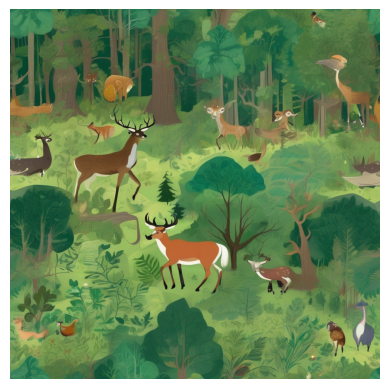

In [13]:
# Display the image using matplotlib
plt.imshow(images)
plt.axis('off')
plt.show()


Decided to try a different model so wentr with this one https://huggingface.co/stabilityai/sdxl-turbo

In [ ]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")

pipe.to("cuda")

image = pipe(prompt=prompt, negative_prompt=negative_prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()